In [1]:
from FinancialMachineLearning.features.microstructure import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [3]:
data = pd.read_csv('./Data/IVEfuture.txt')

#### Tick rule

In [4]:
aggressor = tick_rule(data['price'])
aggressor

0           1.0
1          -1.0
2           1.0
3           1.0
4           1.0
           ... 
10930208   -1.0
10930209   -1.0
10930210    1.0
10930211    1.0
10930212   -1.0
Length: 10930213, dtype: float64

#### The Roll Model

In [5]:
spread, noise = roll_model(data['price'])
spread, noise

(0.30976579807256693, -0.1905194285363162)

#### Range Volatility

In [6]:
dollar = pd.read_csv('./Data/dollar_IVEfuture.csv')
vol = range_volatility(dollar.high, dollar.low, window = 50)

Text(0.5, 1.0, 'Estimated Range Volatility')

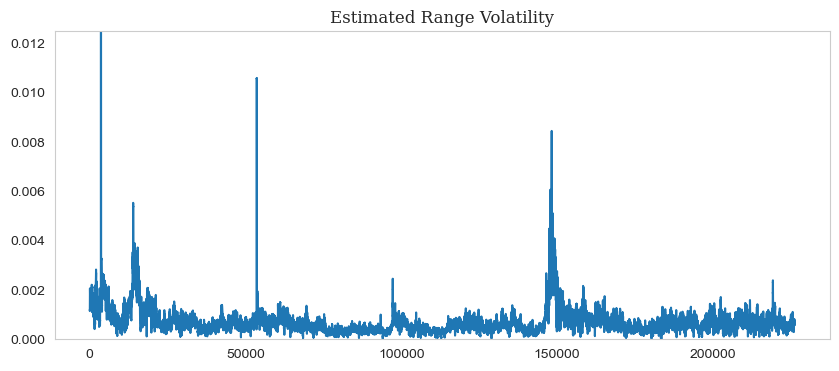

In [7]:
plt.figure(figsize = (10,4))
vol.plot(grid = False)
plt.ylim([0, 0.0125])
plt.title('Estimated Range Volatility', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Dollar Value Bars')

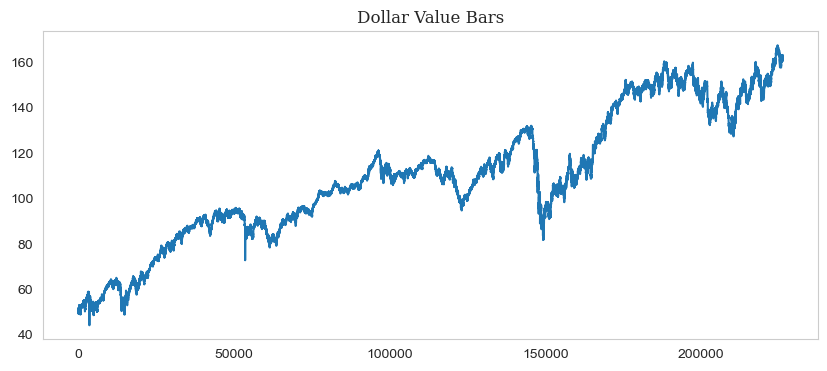

In [8]:
plt.figure(figsize = (10,4))
dollar.close.plot(grid = False)
plt.title('Dollar Value Bars', fontsize = 12, fontfamily = 'Serif')

#### Corwin Schultz Spread

In [9]:
spread = corwin_schultz_spread(dollar.high, dollar.low, 100)
vol = becker_parkinson_volatility(dollar.high, dollar.low, 100)

Text(0.5, 1.0, 'Corwin Schultz Spread')

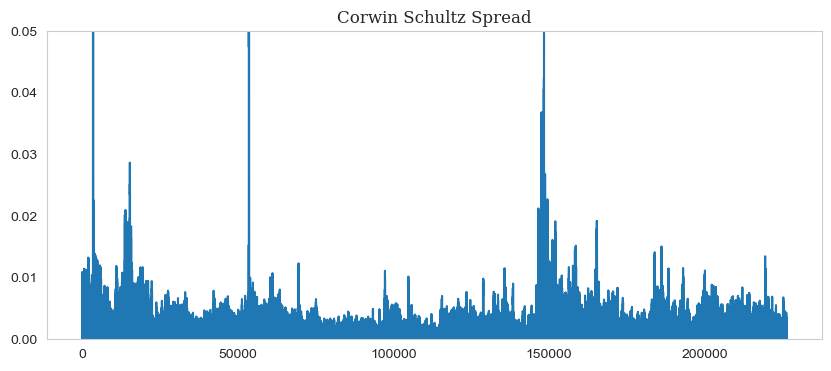

In [13]:
plt.figure(figsize = (10,4))
plt.plot(spread)
plt.grid(False)
plt.ylim([0, 0.05])
plt.title('Corwin Schultz Spread', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Estimated Backer Parkinson Volatility')

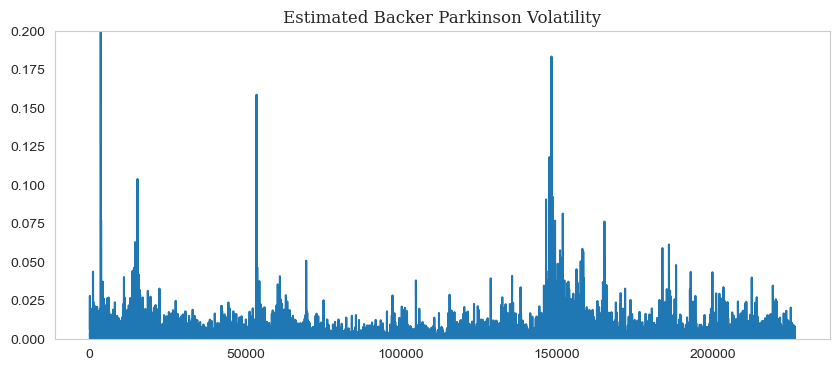

In [14]:
plt.figure(figsize = (10,4))
plt.plot(vol)
plt.grid(False)
plt.ylim([0, 0.2])
plt.title('Estimated Backer Parkinson Volatility', fontsize = 12, fontfamily = 'Serif')

#### Kyle's Lambda

In [16]:
#from FinancialMachineLearning.barsampling.bar_feature import BarFeature
#kyles_lambda_feature = BarFeature(name = 'kyles_lambda', function= lambda df: kyleLambda(dv['close'], dv['volume'], aggressor))
#bars = dollarBar('./Data/maks_tick_data.csv', threshold = 1000000, batch_size = 1000000,additional_features=[kyles_lambda_feature])
#plt.figure(figsize = (10,4))
#bars['kyles_lambda'].hist(bins = 5)
#plt.title(r"Kyle's $\lambda$", fontsize = 12, fontfamily = 'Serif')

In [15]:
lambda_feature = Lambda(dollar['close'], dollar['volume'])
kyle_lambda = lambda_feature.kyle(signs = aggressor)
kyle_lambda

0                    NaN
1          -2.853881e-06
2           0.000000e+00
3           5.088541e-07
4           5.515720e-06
                ...     
10930208             NaN
10930209             NaN
10930210             NaN
10930211             NaN
10930212             NaN
Length: 10930213, dtype: float64

Text(0.5, 1.0, "Kyle's $\\lambda$")

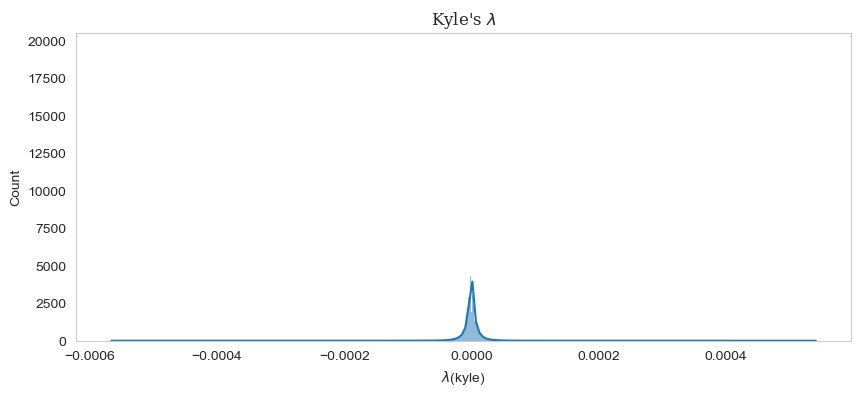

In [16]:
import seaborn as sns
fig , ax = plt.subplots(figsize = (10, 4))
sns.histplot(kyle_lambda, kde = True, ax = ax)
plt.grid(False)
plt.xlim
plt.xlabel(r"$\lambda$(kyle)")
plt.title(r"Kyle's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Amihud's Lambda

In [19]:
#dollar_volume_feature = BarFeature(name = 'dollar_volume', function= lambda df: dollarVolume(dv['close'], dv['volume']))
#bars2 = dollarBar('./Data/maks_tick_data.csv', threshold = 1000000, batch_size = 1000000,additional_features = [dollar_volume_feature])
#bars2['dollar_volume']
#lambda_ = amihudLambda(bars['close'], bars['dollar_volume'])
#lambda_

In [17]:
amihud_lambda = lambda_feature.aminud()
amihud_lambda

0                  NaN
1         5.584896e-08
2         0.000000e+00
3         9.951189e-09
4         1.077395e-07
              ...     
226209    2.975343e-08
226210    5.142157e-08
226211    3.884874e-08
226212    1.968350e-08
226213    1.902195e-09
Length: 226214, dtype: float64

Text(0.5, 1.0, "Amihud's $\\lambda$")

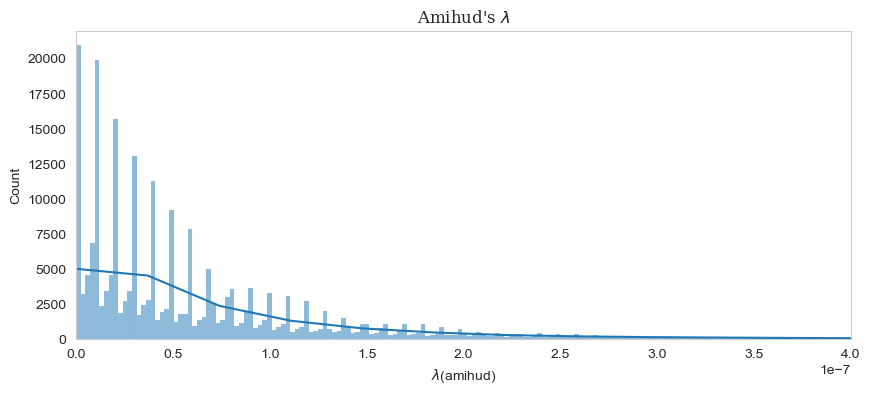

In [21]:
fig , ax = plt.subplots(figsize = (10, 4))
sns.histplot(amihud_lambda, kde = True, ax = ax)
plt.xlabel(r"$\lambda$(amihud)")
plt.grid(False)
plt.xlim([0,0.0000004])
plt.title(r"Amihud's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Hasbrouck's Lambda

In [22]:
#def get_hasbroucks_flow(df):
    #tick_signs = TickRule(df['price'])
    #return hasbroucks_flow(df['price'], df['volume'], tick_signs)
#hasbroucks_flow_feature = BarFeature(name = 'hasbroucks_flow', function=get_hasbroucks_flow)
#bars = dollarBar('./Data/maks_tick_data.csv', threshold = 1000000, batch_size = 1000000,additional_features=[hasbroucks_flow_feature])
#lambda_ = hasbrouckLambda(bars['close'], bars['hasbroucks_flow'], aggressor)
#lambda_

In [22]:
hasbrouck_lambda = lambda_feature.hasbrouck(signs = aggressor)
hasbrouck_lambda

0                NaN
1          -0.000008
2           0.000000
3           0.000001
4           0.000015
              ...   
10930208         NaN
10930209         NaN
10930210         NaN
10930211         NaN
10930212         NaN
Length: 10930213, dtype: float64

Text(0.5, 1.0, "Hasbrouck's $\\lambda$")

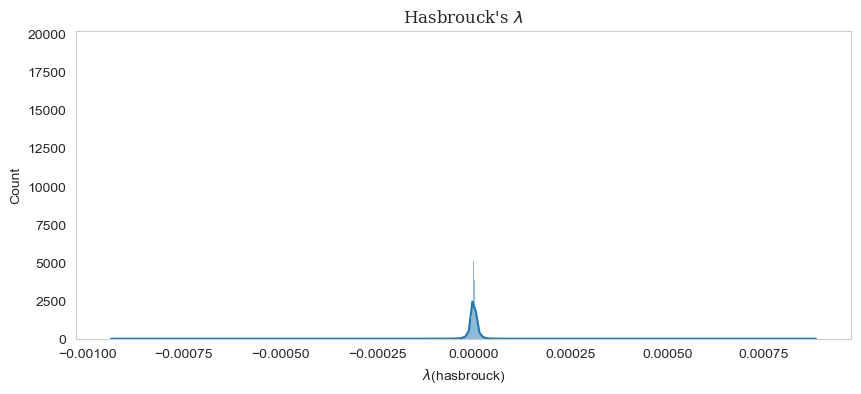

In [23]:
fig , ax = plt.subplots(figsize = (10, 4))
sns.histplot(hasbrouck_lambda, kde = True, ax = ax)
plt.xlabel(r"$\lambda$(hasbrouck)")
plt.grid(False)
plt.title(r"Hasbrouck's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Third Generation : Sequential Trade Models

**VPIN**

In [25]:
from FinancialMachineLearning.barsampling.standard_bar import volumeBar

def buy_volume(df):
    tick_signs = TickRule(df['price'])
    return (df['volume'] * (tick_signs > 0)).sum()
def sell_volume(df):
    tick_signs = TickRule(df['price'])
    return (df['volume'] * (tick_signs < 0)).sum()

In [27]:
from FinancialMachineLearning.barsampling.bar_feature import BarFeature
buy_volume_feature = BarFeature(name = 'buy_volume', function = buy_volume)
sell_volume_feature = BarFeature(name = 'sell_volume', function = sell_volume)

In [28]:
bars = volumeBar('./Data/maks_tick_data.csv', 
                 additional_features = [buy_volume_feature, sell_volume_feature])
vol_thres = 10000
vpin_series = vpin(bars['buy_volume'], bars['sell_volume'], vol_thres, 5)

Reading data in batches:
Batch number: 0
Returning bars 


Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

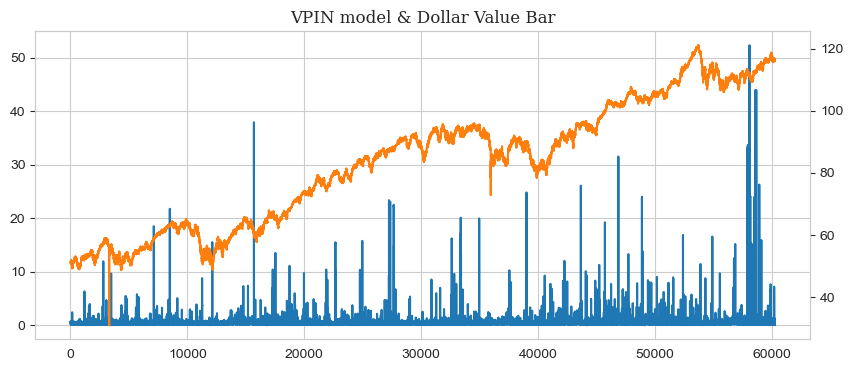

In [29]:
plt.figure(figsize=(10, 4))
vpin_series.plot()
bars['close'].plot(secondary_y = True)
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

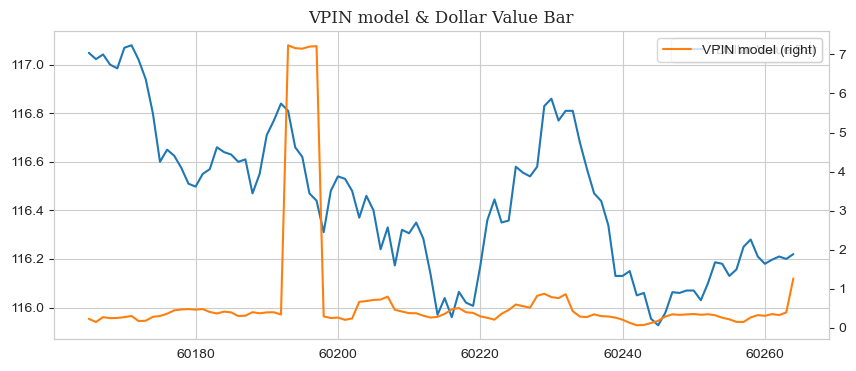

In [32]:
plt.figure(figsize=(10, 4))
bars['close'][-100:].plot(label = 'Dollar Value Bar')
plt.legend()
vpin_series[-100:].plot(label = 'VPIN model', secondary_y = True)
plt.legend()
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')